# Implementación de árboles de decisión

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

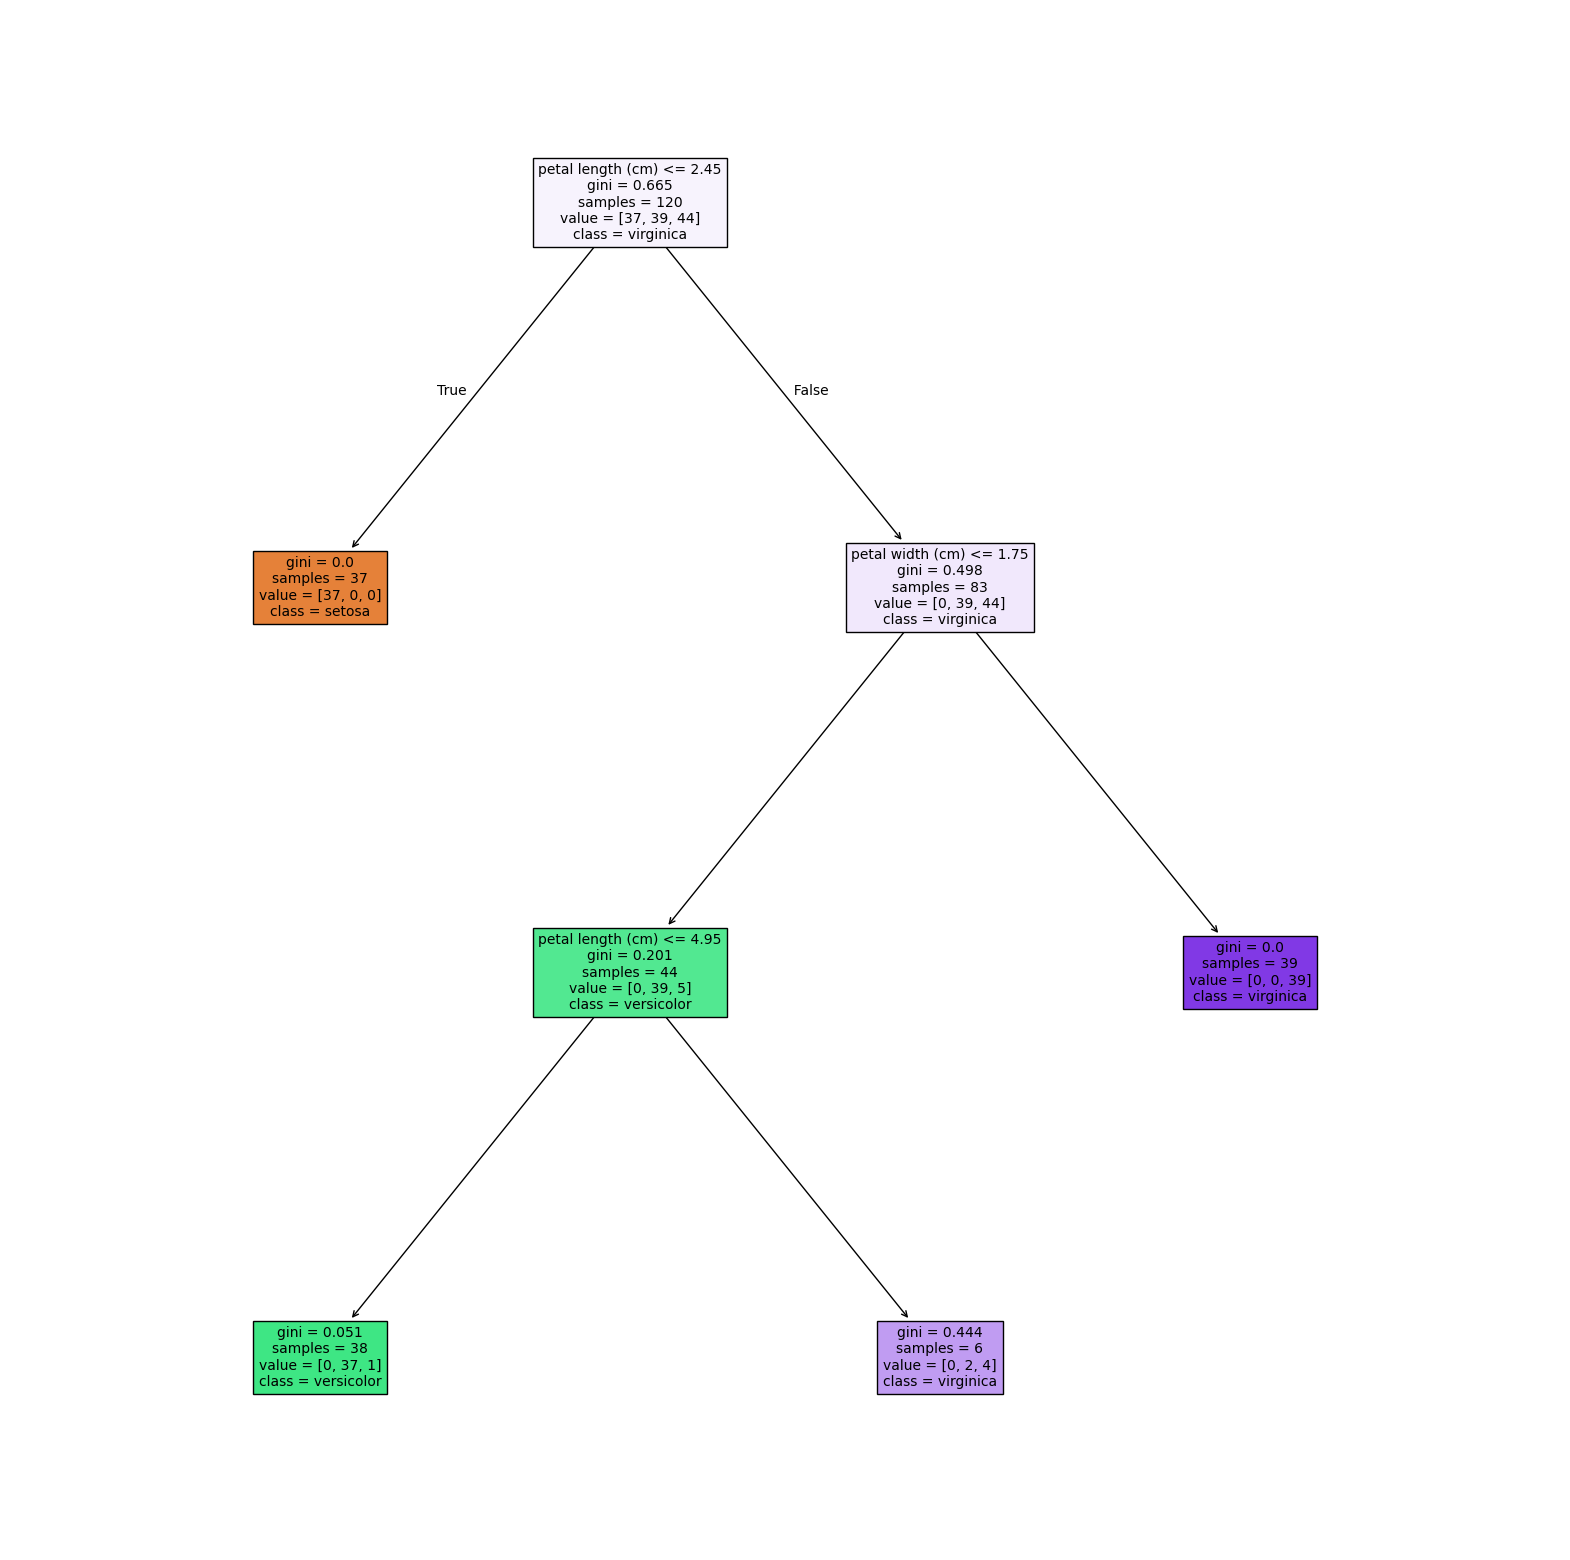

In [14]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=10)
plt.show()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.91      0.95        11
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
from sklearn.model_selection import GridSearchCV, KFold

In [24]:
prametros = {
    'ccp_alpha': [0.0,0.01,0.1],
    'max_depth': [None, 2,3,4,5,10]
}

cv = KFold(n_splits=5, shuffle=True,random_state=42)
pc_grid = GridSearchCV(model,prametros, cv = cv, scoring= 'accuracy')
pc_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [25]:
pc_grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': None}